In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(
    './train_data.csv',
    low_memory=False
)
display(df)

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118912,BRAND_2058,2.074438,2.058055,BRAND_2058_COUNTRY_C8F4,CORP_3C9A,COUNTRY_C8F4,2020-11-01,2022-12-01,DRUG_ID_74A6,-1,['IND_A496'],-1.000000,1.049808,0.095233,1.054007,1.100336,2.029851,THER_AREA_6CEE,1.203657
118913,BRAND_4888,1.756234,1.819485,BRAND_4888_COUNTRY_6F78,CORP_A713,COUNTRY_6F78,2019-07-01,2022-12-01,DRUG_ID_52A5,-1,['IND_617C'],1.173333,1.008985,0.033939,1.008317,1.029630,1.955224,THER_AREA_980E,1.109272
118914,BRAND_0056,1.127497,1.491552,BRAND_0056_COUNTRY_0C7D,CORP_01C7,COUNTRY_0C7D,2018-09-01,2022-12-01,DRUG_ID_D637,-1,['IND_FC21'],1.826667,1.121505,0.012526,1.017259,1.018310,1.926795,THER_AREA_644A,1.343341
118915,BRAND_6200,1.874532,2.020277,BRAND_6200_COUNTRY_89F9,CORP_39F7,COUNTRY_89F9,2020-09-01,2022-12-01,DRUG_ID_B0E9,2020-11-01 00:00:00,['IND_B2EF'],-1.000000,1.520144,0.001334,1.960978,2.490911,1.985847,THER_AREA_96D7,1.266831


In [3]:
# --------------------------- Drug Related Feature --------------------------

In [19]:
drug_df = df[['target', 'indication', 'ind_launch_date', 'therapeutic_area', 'prev_perc', 'price_unit', 'price_month']]

# Label encoding for 'indication' and 'therapeutic_area'
label_encoder = LabelEncoder()

drug_df['indication'] = label_encoder.fit_transform(drug_df['indication'])
drug_df['therapeutic_area'] = label_encoder.fit_transform(drug_df['therapeutic_area'])
drug_df['ind_launch_date'] = label_encoder.fit_transform(drug_df['ind_launch_date'])

/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_14941/1846822262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df['indication'] = label_encoder.fit_transform(drug_df['indication'])
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_14941/1846822262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df['therapeutic_area'] = label_encoder.fit_transform(drug_df['therapeutic_area'])
/var/folders/66/rq8b0mrn2556f1qx80fwjkqw0000gn/T/ipykernel_14941/1846822262.py:8: SettingWithC

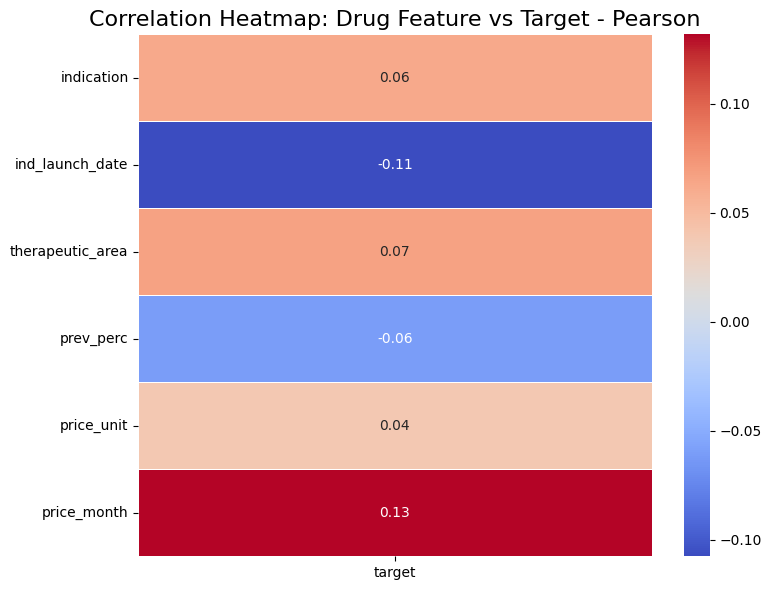

In [23]:
# Calculate the correlation matrix for all columns
correlation_matrix = drug_df.corr()

# Filter the correlation matrix to only include features and target correlation
heatmap_data = correlation_matrix[['target']].drop('target', axis=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Heatmap: Drug Feature vs Target - Pearson', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

All variable have low correlation < 0.3 

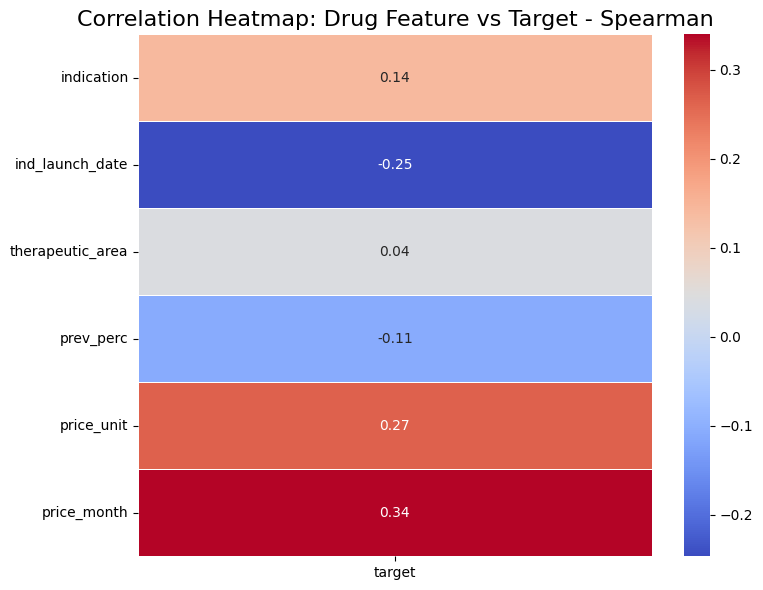

In [24]:
# Calculate the correlation matrix for all columns
correlation_matrix = drug_df.corr(method='spearman')

# Filter the correlation matrix to only include features and target correlation
heatmap_data = correlation_matrix[['target']].drop('target', axis=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Heatmap: Drug Feature vs Target - Spearman', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Price per month have medium correlation 0.3<r<0.7

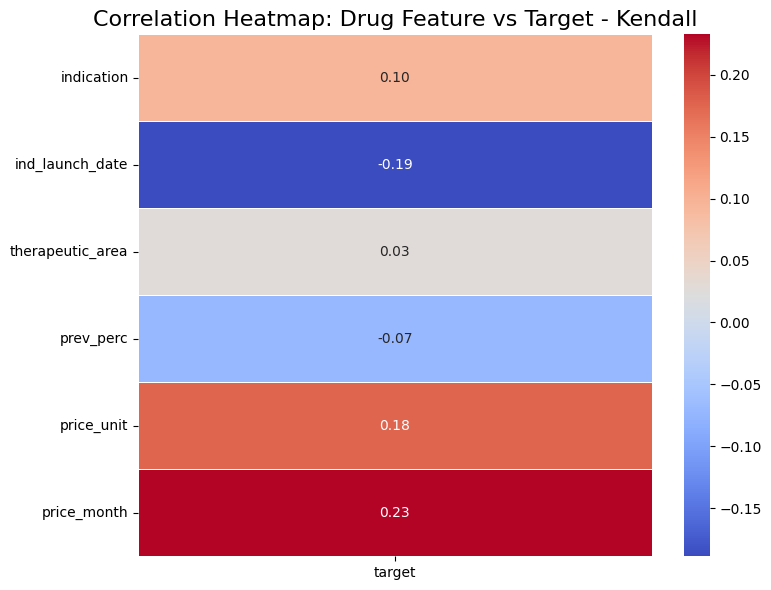

In [25]:
# Calculate the correlation matrix for all columns
correlation_matrix = drug_df.corr(method='kendall')

# Filter the correlation matrix to only include features and target correlation
heatmap_data = correlation_matrix[['target']].drop('target', axis=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Heatmap: Drug Feature vs Target - Kendall', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

All low correlation

In [4]:
# --------------------------- Country-related and Auxiliary Variables --------------------------

In [27]:
country_related_df = df[['target', 'population', 'public_perc_che', 'che_perc_gdp', 'che_pc_usd']]

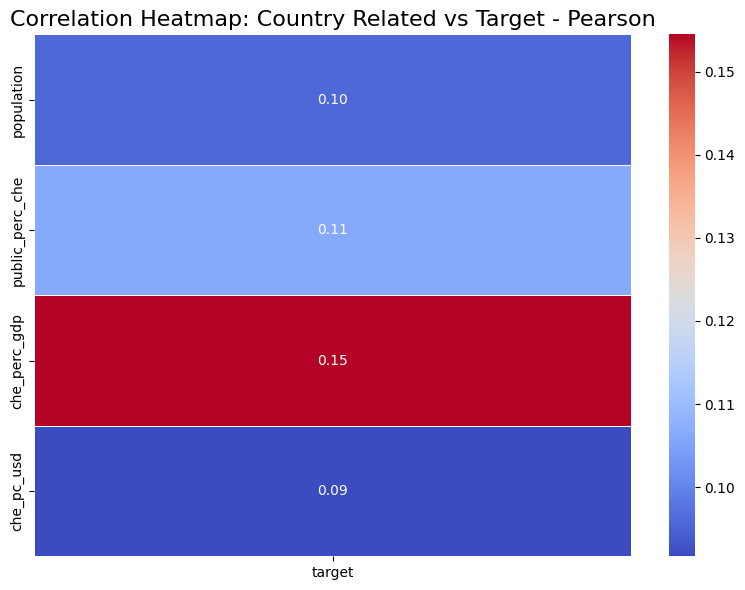

In [29]:
# Calculate the correlation matrix for all columns
correlation_matrix = country_related_df.corr()

# Filter the correlation matrix to only include features and target correlation
heatmap_data = correlation_matrix[['target']].drop('target', axis=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Heatmap: Country Related vs Target - Pearson', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

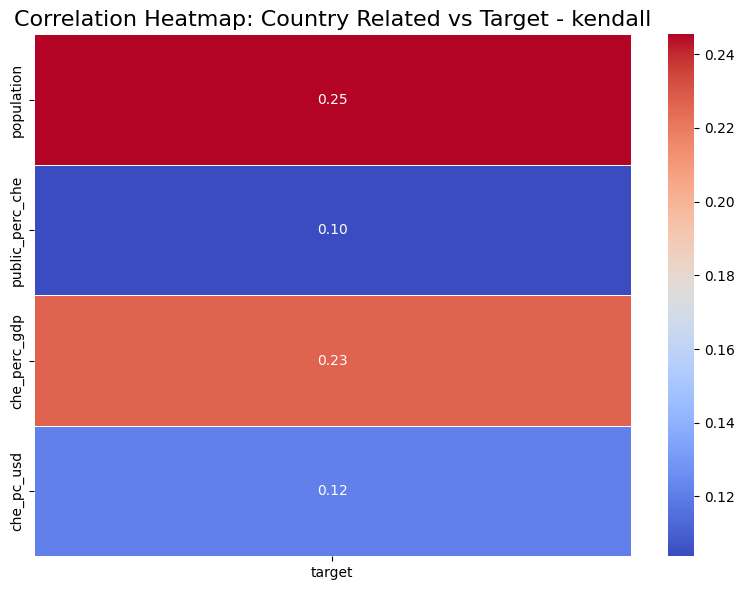

In [30]:
# Calculate the correlation matrix for all columns
correlation_matrix = country_related_df.corr(method='kendall')

# Filter the correlation matrix to only include features and target correlation
heatmap_data = correlation_matrix[['target']].drop('target', axis=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Heatmap: Country Related vs Target - kendall', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

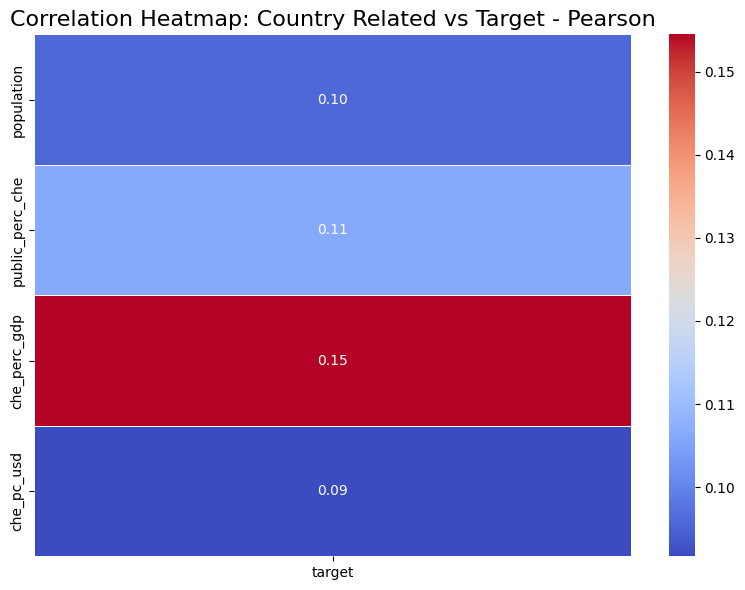

In [31]:
# Calculate the correlation matrix for all columns
correlation_matrix = country_related_df.corr(method='pearson')

# Filter the correlation matrix to only include features and target correlation
heatmap_data = correlation_matrix[['target']].drop('target', axis=0)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    fmt=".2f", 
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Heatmap: Country Related vs Target - Pearson', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Conculsion: Country variable have low correlation

In [ ]:
# --------------------------- Pairwise Correlation --------------------------